# LAB 03 - Data preprocessing 1

## 01 데이터 구조 점검 1



[1-1] 과일 가게 매출 기록 정리하기

- 친한 친구가 작은 과일 가게를 운영하기 시작했습니다.친구는 매일의 판매 기록을 수첩에 손으로 적어 두었는데, 이제 체계적인 데이터 관리를 위해 당신에게 도움을 요청했습니다.
- 친구가 어설프게 만든 초기 데이터셋의 이름은 fruit_shop입니다. 이 데이터셋을 분석에 용이하도록 주어진 요구사항을 수행하세요.
- hossam 라이브러리를 사용해서 데이터셋을 불러올 수 있습니다.

1. 데이터는 총 몇 행, 몇 열로 구성되어 있는지와 각 변수의 데이터 타입을 확인하세요.

2. 데이터의 변수 이름을 살펴보니 Num_Sold만 영어로 되어 있습니다. 일관성을 위해 판매량으로 변경하세요.

3. 데이터 타입 확인 결과 몇 가지 타입을 더 효율적으로 변경해야 할 것 같습니다. 아래의 두 가지 타입 변환을 한 번에 일괄 처리하세요.
3-1) 과일 열은 과일의 종류가 반복됩니다. 메모리 효율을 위해 일반 문자열 타입이 아닌 명목형 데이터로 변경하세요.
3-2) 등급 열은 과일의 품질을 나타내며, 'A', 'B', 'C' 사이에는 순서(A > B > C)가 있습니다. 이를 적합한 데이터 타입으로 변경하세요.

4. 전처리가 완료된 최종 데이터셋의 정보를 다시 확인하세요.

In [3]:
# hossam 라이브러리에서 데이터 셋 불러오기
from hossam import load_data
from pandas import CategoricalDtype

fruit_shop = load_data('fruit_shop')
fruit_shop

[data] https://data.hossam.kr/data/lab03/fruit_shop.xlsx
[desc] 어느 과일 가게의 매출을 정리한 가상의 데이터(인덱스와 메타데이터 없음)
[!] Cannot read metadata


,판매일,과일,등급,가격,Num_Sold
0,1,사과,A,1500,10
1,1,바나나,B,1000,15
2,1,사과,B,1200,5
3,2,복숭아,A,2500,8
4,2,바나나,A,1200,12
5,2,사과,C,1000,20
6,3,사과,A,1500,12
7,3,복숭아,B,2200,10
8,3,바나나,B,1000,18
9,4,바나나,A,1200,20


In [4]:
#1. 데이터는 총 몇 행, 몇 열로 구성되어 있는지와 각 변수의 데이터 타입을 확인하세요.

rows,cols = fruit_shop.shape
print(f'{rows} 행, {cols} 열 , {fruit_shop.ndim} 차원의 데이터 입니다')


12 행, 5 열 , 2 차원의 데이터 입니다


In [5]:
fruit_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판매일       12 non-null     int64 
 1   과일        12 non-null     object
 2   등급        12 non-null     object
 3   가격        12 non-null     int64 
 4   Num_Sold  12 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 612.0+ bytes


In [6]:

#2. 데이터의 변수 이름을 살펴보니 Num_Sold만 영어로 되어 있습니다. 일관성을 위해 판매량으로 변경하세요.

Num_Sold컬럼변경df = fruit_shop.rename (
  columns ={'Num_Sold':'판매량'}

)
Num_Sold컬럼변경df

,판매일,과일,등급,가격,판매량
0,1,사과,A,1500,10
1,1,바나나,B,1000,15
2,1,사과,B,1200,5
3,2,복숭아,A,2500,8
4,2,바나나,A,1200,12
5,2,사과,C,1000,20
6,3,사과,A,1500,12
7,3,복숭아,B,2200,10
8,3,바나나,B,1000,18
9,4,바나나,A,1200,20


In [7]:
#3. 데이터 타입 확인 결과 몇 가지 타입을 더 효율적으로 변경해야 할 것 같습니다. 아래의 두 가지 타입 변환을 한 번에 일괄 처리하세요.

#3-1) 과일 열은 과일의 종류가 반복됩니다. 메모리 효율을 위해 일반 문자열 타입이 아닌 명목형 데이터로 변경하세요.

과일열_명목화df2 = Num_Sold컬럼변경df.astype({'과일':'category'})
과일열_명목화df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   판매일     12 non-null     int64   
 1   과일      12 non-null     category
 2   등급      12 non-null     object  
 3   가격      12 non-null     int64   
 4   판매량     12 non-null     int64   
dtypes: category(1), int64(3), object(1)
memory usage: 660.0+ bytes


In [8]:
#3-2) 등급 열은 과일의 품질을 나타내며, 'A', 'B', 'C' 사이에는 순서(A > B > C)가 있습니다. 이를 적합한 데이터 타입으로 변경하세요.


등급열_서열화df = 과일열_명목화df2.astype({
     '등급':CategoricalDtype(categories=['A','B','C'],ordered=True)

})

등급열_서열화df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   판매일     12 non-null     int64   
 1   과일      12 non-null     category
 2   등급      12 non-null     category
 3   가격      12 non-null     int64   
 4   판매량     12 non-null     int64   
dtypes: category(2), int64(3)
memory usage: 708.0 bytes


- 데이터 타입 변경시에 한번에 여러가지를 진행할 수도 있었음
 a=b.astype({
   '과일':'category',
   '등급':CategoricalDtype(categories=['A','B','C'],ordered=True)
  
 })

In [9]:
#4. 전처리가 완료된 최종 데이터셋의 정보를 다시 확인하세요.
print(등급열_서열화df)

    판매일   과일 등급    가격  판매량
0     1   사과  A  1500   10
1     1  바나나  B  1000   15
2     1   사과  B  1200    5
3     2  복숭아  A  2500    8
4     2  바나나  A  1200   12
5     2   사과  C  1000   20
6     3   사과  A  1500   12
7     3  복숭아  B  2200   10
8     3  바나나  B  1000   18
9     4  바나나  A  1200   20
10    4   사과  B  1200   11
11    4  복숭아  A  2500   15


[1-2] 연습문제

네 종류의 식단 A1, A2, A3, A4에 따른 식이 요법이 혈액 응고 시간에 영향을 주는지 알고자 실험한 자료가 다음과 같다.
- 인자의 수준을 나타내는 변수를 class로, 실측 값을 time으로 하여 데이터를 구성하여라.
- class 변수는 명목형 변수이다.


In [10]:
from pandas import DataFrame
from pandas import Series

classA = [ [62,60,63,59,61,0,0] , [62,67,71,64,65,66,0],[68,66,71,67,68,69,70],[58,62,60,59,61,63,64]]

i_names =['A1','A2','A3','A4']
c_names =['time1','time2','time3','time4','time5','time6','time7']
classA_df =DataFrame(classA,index = i_names,columns=c_names)

classA_df


,time1,time2,time3,time4,time5,time6,time7
A1,62,60,63,59,61,0,0
A2,62,67,71,64,65,66,0
A3,68,66,71,67,68,69,70
A4,58,62,60,59,61,63,64


In [11]:
A인덱스해제df = classA_df.reset_index()
A인덱스해제df

,index,time1,time2,time3,time4,time5,time6,time7
0,A1,62,60,63,59,61,0,0
1,A2,62,67,71,64,65,66,0
2,A3,68,66,71,67,68,69,70
3,A4,58,62,60,59,61,63,64


In [12]:
A이름변경df=A인덱스해제df.rename(
  columns={'index':'class'}
)
A이름변경df

,class,time1,time2,time3,time4,time5,time6,time7
0,A1,62,60,63,59,61,0,0
1,A2,62,67,71,64,65,66,0
2,A3,68,66,71,67,68,69,70
3,A4,58,62,60,59,61,63,64


In [13]:
A명목화df = A이름변경df.astype({'class':'category'})
A명목화df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   class   4 non-null      category
 1   time1   4 non-null      int64   
 2   time2   4 non-null      int64   
 3   time3   4 non-null      int64   
 4   time4   4 non-null      int64   
 5   time5   4 non-null      int64   
 6   time6   4 non-null      int64   
 7   time7   4 non-null      int64   
dtypes: category(1), int64(7)
memory usage: 564.0 bytes


In [14]:
A명목화df

,class,time1,time2,time3,time4,time5,time6,time7
0,A1,62,60,63,59,61,0,0
1,A2,62,67,71,64,65,66,0
2,A3,68,66,71,67,68,69,70
3,A4,58,62,60,59,61,63,64


In [15]:
#세로로 쌓기

from pandas import DataFrame
import pandas as pd

data = {
    "class": ["A1","A1","A1","A1","A1",
              "A2","A2","A2","A2","A2",
              "A3","A3","A3","A3","A3",
              "A4","A4","A4","A4","A4"],
    
    "time": [62, 60, 63, 59, 61,
             62, 67, 71, 64, 65,
             66, 68, 66, 71, 67,
             68, 69, 70, 58, 62]
}

df = DataFrame(data)

# class를 명목형(category)으로 변환
new_df = df.astype({'class': 'category'})

# 확인
print(new_df)
print(new_df.info())


   class  time
0     A1    62
1     A1    60
2     A1    63
3     A1    59
4     A1    61
5     A2    62
6     A2    67
7     A2    71
8     A2    64
9     A2    65
10    A3    66
11    A3    68
12    A3    66
13    A3    71
14    A3    67
15    A4    68
16    A4    69
17    A4    70
18    A4    58
19    A4    62
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   class   20 non-null     category
 1   time    20 non-null     int64   
dtypes: category(1), int64(1)
memory usage: 516.0 bytes
None


## 02 데이터 구조 점검 2

- 당신은 신비한 생물을 연구하는 비밀 연구소의 신입 데이터 분석가입니다.
- 연구원들이 수기로 작성하던 관찰 기록을 처음으로 디지털화했지만, 데이터가 엉망진창입니다.
- 당신의 임무는 이 데이터를 깔끔하게 정리하여 곧 있을 학회 발표 자료로 만드는 것입니다.
- monsters 데이터셋을 DataFrame으로 불러온 후, 아래의 요구사항에 따라 데이터를 수정하고 최종 결과를 출력하세요.

1. 데이터의 첫인상:
가장 먼저 데이터의 기본적인 정보(info)를 파악하세요.

2. 쓸모없는 정보 삭제:
last_seen 열은 이번 발표에 필요 없는 정보입니다. 해당 열을 데이터에서 삭제하세요.

3. 신규 개체 추가:
최근 M021 ID를 가진 신규 개체 Kelpie가 발견되었습니다.
아래 정보를 가진 행(row)을 Series 객체로 생성한 후 DataFrame에 새로 추가하세요.
이 개체의 weight는 측정되지 않았습니다.


4. 데이터 오류 수정:
M004 개체는 사실 M003 개체를 잘못 기록한 것입니다.
M004 행의 모든 데이터를 M003 행의 데이터와 동일하게 수정한 후,
M004 행의 ID를 M003_copy 로 변경하세요.

5. 최종 보고서용 정렬:
발표 자료는 다음 순서로 열이 정렬되어야 합니다:
monster_id, caution_level, species, habitat, height, weight
최종 DataFrame의 열 순서를 이 순서에 맞게 재배치하세요.

In [16]:
from hossam import load_data
from pandas import Series

secret_monster = load_data('monsters')
secret_monster

[data] https://data.hossam.kr/data/lab03/monsters.xlsx
[desc] 신비한 생물 연구소의 몬스터 데이터

field          description
-------------  ----------------------
monster_id     몬스터 고유 ID
last_seen      마지막으로 관찰된 날짜
species        생물 종
habitat        서식지
height         키 (m)
weight         몸무게 (kg)
caution_level  위험 등급



,monster_id,last_seen,species,habitat,height,weight,caution_level
0,M001,2024-01-15,Griffin,Mountain,2.5,150.5,High
1,M002,2024-02-20,Unicorn,Forest,2.1,120.0,Low
2,M003,2024-03-10,Dragon,Volcano,15.2,5500.0,Very High
3,M004,2024-03-12,Dragon,Volcano,14.8,5300.0,Very High
4,M005,2024-04-05,Kraken,Ocean,30.5,15000.0,High
5,M006,2024-05-21,Phoenix,Desert,1.8,25.5,Medium
6,M007,2024-06-30,Mermaid,Ocean,1.9,65.5,Low
7,M008,2024-07-14,Goblin,Cave,1.1,40.2,Medium
8,M009,2024-08-01,Fairy,Forest,0.3,0.5,Low
9,M010,2024-09-10,Hydra,Swamp,5.5,800.0,High


In [17]:
# 1. 데이터의 첫 인상
monster_rows ,monster_cols = secret_monster.shape
print(f'{monster_rows} 행, {monster_cols} 열 , {secret_monster.ndim} 차원의 데이터')

20 행, 7 열 , 2 차원의 데이터


In [18]:
secret_monster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   monster_id     20 non-null     object        
 1   last_seen      20 non-null     datetime64[ns]
 2   species        20 non-null     object        
 3   habitat        20 non-null     object        
 4   height         20 non-null     float64       
 5   weight         20 non-null     float64       
 6   caution_level  20 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.2+ KB


In [19]:
# 2. 쓸모없는 데이터 삭제
last_seen삭제df = secret_monster.copy()
last_seen삭제결과df = last_seen삭제df.drop(columns='last_seen')
last_seen삭제결과df

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,M003,Dragon,Volcano,15.2,5500.0,Very High
3,M004,Dragon,Volcano,14.8,5300.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [20]:
# 3.신규 개체 추가
Kelpie_행추가df = last_seen삭제결과df.copy()
s=Series(['M021','Kelpie','Lake','2.2','Medium'],index=['monster_id','speicies','habitat','height','caution_level'])

Kelpie_행추가df.loc['20']=s

#[df.index.max()+1] 처럼 표현할 수 있음

Kelpie_행추가df

#'monster_id' : 'M021', 'speicies':'Kelpie','habitat':'Lake','height':'2.2','caution_level':'Medium'

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,M003,Dragon,Volcano,15.2,5500.0,Very High
3,M004,Dragon,Volcano,14.8,5300.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [21]:
# 4. 데이터 오류 수정
#'𝑀004'행의모든데이터를 'M003'행의데이터와동일하게수정한후,'𝑀004'행의𝐼𝐷를'𝑀003_𝑐𝑜𝑝𝑦'로변경하세요

MOO4변경_df =Kelpie_행추가df.copy()

MOO4변경_df.loc[3]=MOO4변경_df.loc[2]

#df[df['monster_id] == 'M003].copy() #이런식으로 표현할 수도 있음
MOO4변경_df

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,M003,Dragon,Volcano,15.2,5500.0,Very High
3,M003,Dragon,Volcano,15.2,5500.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [22]:
MOO4이름변경_df = MOO4변경_df.copy()
MOO4이름변경_df.loc[2,'monster_id'] = '𝑀003_𝑐𝑜𝑝𝑦'
MOO4이름변경_df

,monster_id,species,habitat,height,weight,caution_level
0,M001,Griffin,Mountain,2.5,150.5,High
1,M002,Unicorn,Forest,2.1,120.0,Low
2,𝑀003_𝑐𝑜𝑝𝑦,Dragon,Volcano,15.2,5500.0,Very High
3,M003,Dragon,Volcano,15.2,5500.0,Very High
4,M005,Kraken,Ocean,30.5,15000.0,High
5,M006,Phoenix,Desert,1.8,25.5,Medium
6,M007,Mermaid,Ocean,1.9,65.5,Low
7,M008,Goblin,Cave,1.1,40.2,Medium
8,M009,Fairy,Forest,0.3,0.5,Low
9,M010,Hydra,Swamp,5.5,800.0,High


In [23]:
# 5. 최종정렬 형태 

열순서_변경df = MOO4이름변경_df.reindex(columns= ['monster_id','caution_level','species','habitat','height','weight'])

열순서_변경df

,monster_id,caution_level,species,habitat,height,weight
0,M001,High,Griffin,Mountain,2.5,150.5
1,M002,Low,Unicorn,Forest,2.1,120.0
2,𝑀003_𝑐𝑜𝑝𝑦,Very High,Dragon,Volcano,15.2,5500.0
3,M003,Very High,Dragon,Volcano,15.2,5500.0
4,M005,High,Kraken,Ocean,30.5,15000.0
5,M006,Medium,Phoenix,Desert,1.8,25.5
6,M007,Low,Mermaid,Ocean,1.9,65.5
7,M008,Medium,Goblin,Cave,1.1,40.2
8,M009,Low,Fairy,Forest,0.3,0.5
9,M010,High,Hydra,Swamp,5.5,800.0


In [24]:
from pandas import Series
monsters = load_data('monsters')
# 1. 기본 정보 확인
monsters.info()
monsters.head()

# ---------------------------------------------------------
# 2. last_seen 열 삭제
# ---------------------------------------------------------
df1 = monsters.drop(columns=['last_seen'])
df1.head()

# ---------------------------------------------------------
# 3. 신규 개체 추가 (M021 - Kelpie)
# ---------------------------------------------------------
new_monster = Series({
    'monster_id': 'M021',
    'height': 2.2,
    'habitat': 'Lake',
    'species': 'Kelpie',
    'caution_level': 'Medium',
    'weight': None
})

df2 = df1.copy()
df2.loc[df2.index.max() + 1] = new_monster
df2

# ---------------------------------------------------------
# 4. M004 오류 수정 → M003 데이터로 변경, ID는 M003_copy로 변경
# ---------------------------------------------------------
df3 = df2.copy()

# M003 데이터 추출 및 ID 수정
m003_data = df3[df3['monster_id'] == 'M003'].copy()
m003_data['monster_id'] = 'M003_copy'

# M004의 모든 값을 수정
df3.loc[df3['monster_id'] == 'M004'] = m003_data.iloc[0]
df3

# ---------------------------------------------------------
# 5. 열 순서 재배치
# ---------------------------------------------------------
df4 = df3.reindex(
    columns=['monster_id', 'caution_level', 'species', 'habitat', 'height', 'weight']
)

df4


[data] https://data.hossam.kr/data/lab03/monsters.xlsx
[desc] 신비한 생물 연구소의 몬스터 데이터

field          description
-------------  ----------------------
monster_id     몬스터 고유 ID
last_seen      마지막으로 관찰된 날짜
species        생물 종
habitat        서식지
height         키 (m)
weight         몸무게 (kg)
caution_level  위험 등급

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   monster_id     20 non-null     object        
 1   last_seen      20 non-null     datetime64[ns]
 2   species        20 non-null     object        
 3   habitat        20 non-null     object        
 4   height         20 non-null     float64       
 5   weight         20 non-null     float64       
 6   caution_level  20 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.2+ KB


C:\Users\itwill\AppData\Local\Temp\ipykernel_7216\1966726060.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df2.loc[df2.index.max() + 1] = new_monster


ValueError: Must have equal len keys and value when setting with an iterable

## 03 데이터 정제

안녕하세요, 데이터 분석가님!

최근 한 달간의 판매 기록(month_sales)을 받았는데, 아쉽게도 일부 데이터가 누락되어 있습니다. 정확한 월말 매출 보고를 위해 분석가님의 도움이 필요합니다.아래 미션을 순서대로 해결하여 데이터를 정제해주세요!


✅ 미션 1: 데이터 탐색

먼저 전체 데이터를 불러온 후,
각 열(column)에서 누락값(missing value)이 있는지 확인해주세요.

✅ 미션 2: 신뢰할 수 없는 데이터 제거

이번 데이터셋에서 Quantity(수량) 값이 누락된 데이터는
주문 과정에서 오류가 있었을 가능성이 매우 높습니다.
따라서 분석에서 제외하기로 결정했습니다.

👉 Quantity 열의 값이 결측치인 모든 행(row)을 삭제해주세요.

✅ 미션 3: 가격 정보 복원

일부 제품의 Price(가격) 정보가 누락되어 있습니다.
이를 복원하기 위해 다음 조건을 적용합니다.

👉 누락된 Price 값을 같은 Category(카테고리) 내의 평균 가격으로 채워주세요.

예:

Electronics 카테고리의 평균 가격으로 Electronics의 결측 Price 채움

Furniture 카테고리의 평균 가격으로 Furniture의 결측 Price 채움

In [ ]:
from hossam import load_data
import numpy as np
from pandas import DataFrame
from sklearn.impute import SimpleImputer

origin_data = load_data('month_sales')
origin_data

[data] https://data.hossam.kr/data/lab03/month_sales.xlsx
[desc] 데이터 정제(결측치 처리) 연습문제용 데이터

field     description
--------  -------------
OrderID   주문번호
Product   상품명
Category  상품 카테고리
Price     단가
Quantity  주문 수량



,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1002,Mouse,Electronics,25.0,NaN
1003,Keyboard,Electronics,NaN,5.0
1004,Monitor,Electronics,300.0,8.0
1005,Webcam,Electronics,80.0,NaN
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,NaN,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


In [ ]:
# 1. 데이터 탐색 - 행과 열 수 확인

rows,cols = origin_data.shape
print(f'{rows} 개의 행, {cols} 개의 열, {origin_data.ndim} 차원인 데이터 ')


10 개의 행, 4 개의 열, 2 차원인 데이터 
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1001 to 1010
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   10 non-null     object 
 1   Category  10 non-null     object 
 2   Price     8 non-null      float64
 3   Quantity  7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [ ]:
# 1. 데이터 탐색 - 결측치 수 확인
empty = origin_data.isnull()
empty.sum()

Product     0
Category    0
Price       2
Quantity    3
dtype: int64

In [ ]:
# 2. 신뢰할 수 없는 데이터 제거 - quantity 열에 결측치가 있는 모든 행 제거  (price 에서는 결측치가 있어도 여전히 존재)
na2 = origin_data.dropna(subset =['Quantity'])
na2

,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1003,Keyboard,Electronics,NaN,5.0
1004,Monitor,Electronics,300.0,8.0
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,NaN,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


In [ ]:
na2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 1001 to 1009
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Product   7 non-null      object 
 1   Category  7 non-null      object 
 2   Price     5 non-null      float64
 3   Quantity  7 non-null      float64
dtypes: float64(2), object(2)
memory usage: 280.0+ bytes


In [ ]:
# 3. 가격 정보 복원 : price 가격 정보가 누락된 경우, price 열의 전체 평균 가격으로 값을 채워 넣어 데이터를 복원해주세요

imr = SimpleImputer(missing_values=np.nan,strategy='mean')
imr

,missing_values,nan
,strategy,'mean'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [ ]:
# 숫자로 이루어진 가격 열을 넣어서 평균값인 것들을 대체
na3 = na2.copy()
na3['Price']= imr.fit_transform(na3[['Price']])
na3

,Product,Category,Price,Quantity
OrderID,,,,
1001,Laptop,Electronics,1200.0,10.0
1003,Keyboard,Electronics,339.0,5.0
1004,Monitor,Electronics,300.0,8.0
1006,Desk,Furniture,150.0,3.0
1007,Chair,Furniture,339.0,2.0
1008,Lamp,Furniture,40.0,15.0
1009,Notebook,Stationery,5.0,100.0


## 04 데이터 정제

안녕하세요, 신입 연구원님!
- 당신은 신비한 식물의 성장 패턴을 연구하는 임무를 맡았습니다. 이 식물들은 각각 다른 환경에서 자라며, 우리는 이들의 성장 데이터를 수집해왔습니다.
- 수집된 데이터는 plant_growth 데이터셋입니다. 하지만 데이터를 수집하는 센서에 가끔 오류가 발생하여 비정상적인 값이 기록될 수 있다고 합니다.
- 당신의 임무는 이 데이터에서 이상치를 찾아내고 정제하여, 정확한 분석을 위한 기반을 마련하는 것입니다.


✅ 문제 1: 데이터 불러오기 및 기본 정보 확인

plant_growth 데이터를 불러와 데이터프레임으로 만드세요.

데이터프레임의 기본적인 구조와 정보(처음 5개 행, 각 열의 데이터 타입 및 결측치 여부)를 확인하세요.

✅ 문제 2: 데이터 시각화를 통한 이상치 탐색

각 식물 종(species)별로

height_cm,

sunlight_hours,

water_ml
에 대한 상자그림(boxplot) 을 그려보세요.

생성된 그래프를 보고, 이상치로 의심되는 값들이 어떤 열과 종(species)에 있는지 설명해보세요.

✅ 문제 3: IQR을 이용한 이상치 식별 및 정제

종에 대한 구별 없이 height_cm 열에 대해 IQR을 계산하고, 이를 바탕으로
이상치 경계(하한, 상한)를 구하세요.

출력할 때는 소수점 둘째 자리까지만 표시하세요.

종에 대한 구별 없는 데이터셋을 만들기 위해 종을 의미하는 변수를 제거하세요.

위에서 구한 경계를 벗어나는 이상치를 식별하고, 어떤 값인지 출력하세요.

sunlight_hours 열에 대해서도 동일한 과정을 반복하여 이상치를 찾아내고, 해당 값을 출력하세요.

검출된 이상치를 평균값으로 정제하고, 정제된 결과 데이터셋을 제시하세요.

In [25]:
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [26]:
# 1-1 데이터 불러오기
plant_growth = load_data('plant_growth')
plant_growth

[data] https://data.hossam.kr/data/lab03/plant_growth.xlsx
[desc] 신비한 식물의 성장 기록 데이터

field           description
--------------  ----------------------------------------
plant_id        식물의 고유 ID
species         식물의 종 (GlowLeaf, SunPetal, AquaRoot)
height_cm       식물의 키 (cm)
sunlight_hours  일일 평균 햇빛 노출 시간
water_ml        일일 평균 물 공급량 (ml)



,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495
6,SunPetal,25.3,8.2,705
7,SunPetal,24.9,8.1,698
8,SunPetal,25.5,8.3,710
9,SunPetal,25.1,8.0,702


In [27]:
# 1-1 데이터 불러와 데이터 프레임으로 만들기

plant_growth_df = DataFrame(plant_growth)
plant_growth_df

,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495
6,SunPetal,25.3,8.2,705
7,SunPetal,24.9,8.1,698
8,SunPetal,25.5,8.3,710
9,SunPetal,25.1,8.0,702


In [28]:
#1-2 데이터 프레임의 기본적인 구조와 정보 확인
#첫 5개 행 확인
plant_growth_df.head()

,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495


In [29]:
#각 열의 데이터 타입 
plant_growth_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         20 non-null     object 
 1   height_cm       20 non-null     float64
 2   sunlight_hours  20 non-null     float64
 3   water_ml        20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 800.0+ bytes


In [30]:
#결측치 여부 확인
empty2 = plant_growth_df.isnull()
empty2.sum()

species           0
height_cm         0
sunlight_hours    0
water_ml          0
dtype: int64

In [31]:
#각 식물 종 별로 상자 그림을 그려보자
#생성된 그래프를 보고 이상치로 의심되는 값들이 어떤 열과 종이 있는지 설명해보자


glow_df = plant_growth_df[plant_growth_df['species'] == "GlowLeaf"]
glow_df


,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495
16,GlowLeaf,14.9,5.3,512
17,GlowLeaf,15.3,5.1,508


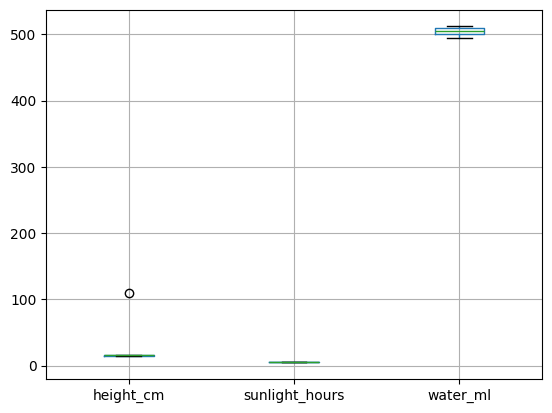

In [32]:
glow_df.boxplot()
plt.show()

In [33]:
sunPetal = plant_growth_df[plant_growth_df['species'] == "SunPetal"]
sunPetal


,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
6,SunPetal,25.3,8.2,705
7,SunPetal,24.9,8.1,698
8,SunPetal,25.5,8.3,710
9,SunPetal,25.1,8.0,702
10,SunPetal,25.4,25.0,708
18,SunPetal,25.0,8.4,715
19,SunPetal,24.8,7.9,695


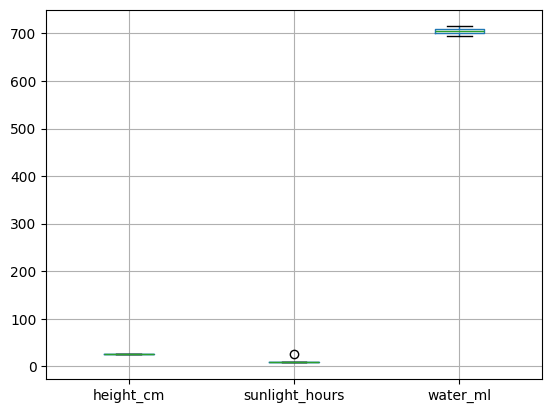

In [34]:
sunPetal.boxplot()
plt.show()

In [35]:
AquaRoot = plant_growth_df[plant_growth_df['species'] == "AquaRoot"]
AquaRoot


,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
11,AquaRoot,8.2,2.1,950
12,AquaRoot,8.5,2.2,960
13,AquaRoot,8.3,2.0,945
14,AquaRoot,8.6,2.3,970
15,AquaRoot,8.4,-1.0,955
20,AquaRoot,8.1,2.4,975


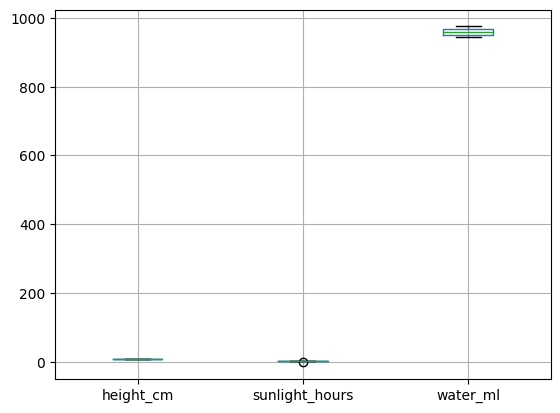

In [ ]:
AquaRoot.boxplot()
plt.show()

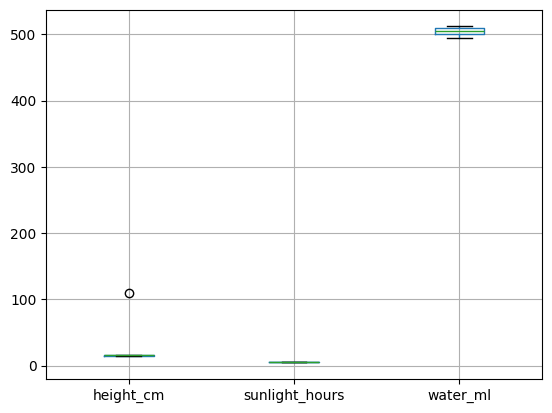

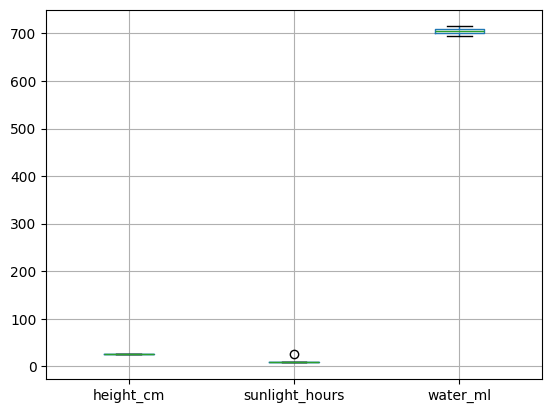

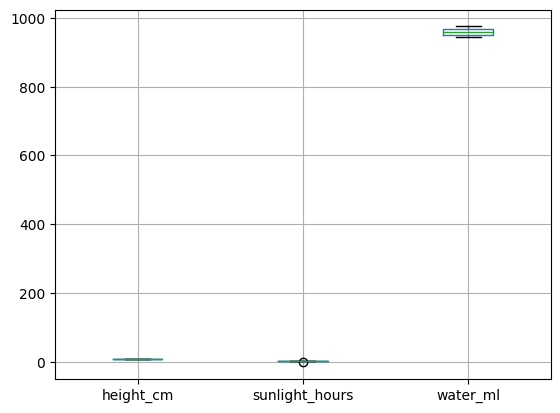

In [ ]:
# 반복문으로 한번에 해결하는 방법

s=plant_growth_df['species'].value_counts()   #species 가 가진 값들



#species 는 시리즈 객체, 즉 리스트처럼 반복문을 돌릴 수 있음

for i in s.index:
  df1=plant_growth_df[plant_growth_df['species']==i]
  df1.boxplot()
  plt.show()

### height_cm 값의 이상치 확인 및 결측치 변환

In [39]:
 #종에 대한 구별 없는 데이터셋을 만들기 위해 종을 의미하는 변수를 제거하세요.

no_species = plant_growth_df.copy()
no_species_resuld_df = no_species.drop(columns=['species'])
no_species_resuld_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.2,5.1,505
2,14.8,4.9,498
3,15.5,5.2,510
4,110.0,5.0,502
5,15.1,4.8,495
6,25.3,8.2,705
7,24.9,8.1,698
8,25.5,8.3,710
9,25.1,8.0,702


In [41]:
# 3 IQR을 이용한 이상치 식별 및 정제


# 종에 대한 구별 없이 height_cm 열에 대해 IQR을 계산
plant_growth_df2 = no_species_resuld_df.copy()

height_cmQ1 = no_species_resuld_df['height_cm'].quantile(0.25)
height_cmQ3 = no_species_resuld_df['height_cm'].quantile(0.75)

height_cm_iqr = height_cmQ3-height_cmQ1
print("height_cm 의 사분위간 범위" , height_cm_iqr)



height_cm 의 사분위간 범위 16.45


In [49]:

# 이상치 경계(하한, 상한)를 구하세요.

height_cm_outline_max = height_cmQ3 + height_cm_iqr*1.5
height_cm_outline_min = height_cmQ1 - height_cm_iqr*1.5


print('height_cm_outline_max 상한 극단치 경계',round(height_cm_outline_max,3))
print('height_cm_outline_min 하한 극단치 경계',round(height_cm_outline_min,3))


#소수점 자리 표현
print(
    f"height_cm에 대한 IQR: {height_cm_iqr:.2f}, "
    f"하한 이상치 경계: {height_cm_outline_min:.2f}, "
    f"상한 이상치 경계: {height_cm_outline_max:.2f}"
)


print(
    "height_cm에 대한 IQR: %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f"
    % (height_cm_iqr, height_cm_outline_min, height_cm_outline_max)
)


height_cm_outline_max 상한 극단치 경계 49.7
height_cm_outline_min 하한 극단치 경계 -16.1
height_cm에 대한 IQR: 16.45, 하한 이상치 경계: -16.10, 상한 이상치 경계: 49.70
height_cm에 대한 IQR: 16.45, 하한 이상치 경계: -16.10, 상한 이상치 경계: 49.70


In [ ]:
#height_cm_outline 하한 이상치 확인
no_species_resuld_df.loc[no_species_resuld_df['height_cm'] < height_cm_outline_min , 'height_cm' ]

Series([], Name: height_cm, dtype: float64)

In [ ]:
#height_cm_outline 상한 이상치 확인
no_species_resuld_df.loc[no_species_resuld_df['height_cm'] > height_cm_outline_max , 'height_cm' ]

plant_id
4    110.0
Name: height_cm, dtype: float64

In [ ]:
# *상한/하한 이상치 한번에 확인하기   or 조건으로
no_species_resuld_df.loc[(no_species_resuld_df['height_cm'] < height_cm_outline_min) | (no_species_resuld_df['height_cm'] > height_cm_outline_max) ]

,height_cm,sunlight_hours,water_ml
plant_id,,,
4,110.0,5.0,502


In [ ]:
#height_cm_outline 상한 이상치를 결측치로 변환  #변환할 때, 열 파라미터를 꼭 지정해줘야 내가 원하는 값만 바뀌고, 없으면 모든 행 값이 바뀐다 

no_species_resuld_df.loc[no_species_resuld_df['height_cm'] > height_cm_outline_max , 'height_cm' ] = np.nan
no_species_resuld_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.2,5.1,505
2,14.8,4.9,498
3,15.5,5.2,510
4,NaN,5.0,502
5,15.1,4.8,495
6,25.3,8.2,705
7,24.9,8.1,698
8,25.5,8.3,710
9,25.1,8.0,702


###  𝑠𝑢𝑛𝑙𝑖𝑔ℎ𝑡_ℎ𝑜𝑢𝑟𝑠 값의 이상치 확인 및 결측치 변환

In [ ]:
# 종에 대한 구별 없이 height_cm 열에 대해 IQR을 계산
plant_growth_df3 = plant_growth_df.copy()

sunlight_hoursQ1 = plant_growth_df3['sunlight_hours'].quantile(0.25)
sunlight_hoursQ3 = plant_growth_df3['sunlight_hours'].quantile(0.75)

sunlight_hours_iqr = sunlight_hoursQ3-sunlight_hoursQ1
print("sunlight_hours 의 사분위간 범위" , sunlight_hours_iqr)



sunlight_hours 의 사분위간 범위 5.65


In [ ]:

# 이상치 경계(하한, 상한)를 구하세요.

sunlight_hours_outline_max = sunlight_hoursQ3 + sunlight_hours_iqr*1.5
sunlight_hours_outline_min = sunlight_hoursQ1 - sunlight_hours_iqr*1.5


print('sunlight_hours_outline_max 상한 극단치 경계',round(sunlight_hours_outline_max,3))
print('sunlight_hours_outline_min 하한 극단치 경계',round(sunlight_hours_outline_min,3))


sunlight_hours_outline_max 상한 극단치 경계 16.5
sunlight_hours_outline_min 하한 극단치 경계 -6.1


In [ ]:
#sunlight_hours_outline 하한 이상치 확인
no_species_resuld_df.loc[no_species_resuld_df['sunlight_hours'] < sunlight_hours_outline_min , 'sunlight_hours' ]

Series([], Name: sunlight_hours, dtype: float64)

In [ ]:
#sunlight_hoursoutline 상한 이상치 확인
no_species_resuld_df.loc[no_species_resuld_df['sunlight_hours'] > sunlight_hours_outline_max , 'sunlight_hours' ]

plant_id
10    25.0
Name: sunlight_hours, dtype: float64

In [ ]:
#sunlight_hoursoutline 상한 이상치를 결측치로 변환
no_species_resuld_df.loc[no_species_resuld_df['sunlight_hours'] > sunlight_hours_outline_max , 'sunlight_hours' ] = np.nan
no_species_resuld_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.2,5.1,505
2,14.8,4.9,498
3,15.5,5.2,510
4,NaN,5.0,502
5,15.1,4.8,495
6,25.3,8.2,705
7,24.9,8.1,698
8,25.5,8.3,710
9,25.1,8.0,702


### 검출된 이상치를 평균값으로 정제


In [ ]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')

df_imr = imr.fit_transform(no_species_resuld_df.values)

final_df = DataFrame(df_imr,
                     index=no_species_resuld_df.index,
                     columns=no_species_resuld_df.columns)

final_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.200000,5.100000,505.0
2,14.800000,4.900000,498.0
3,15.500000,5.200000,510.0
4,16.678947,5.000000,502.0
5,15.100000,4.800000,495.0
6,25.300000,8.200000,705.0
7,24.900000,8.100000,698.0
8,25.500000,8.300000,710.0
9,25.100000,8.000000,702.0
